In [40]:
import pandas as pd
import numpy as np
import ujson as json
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout, BatchNormalization
import tensorflow as tf
from sklearn.metrics import classification_report

In [41]:
#DECLARE CONSTANTS
IMG_HEIGHT = 28
IMG_WIDTH = 28
NUM_FILES = 25000
N_EPOCHS = 315
RANDOM_SEED = 42

In [42]:
#GETTING ALL FILE NAMES
data_files = os.listdir('./data/')
data_files = [f'./data/{file}' for file in data_files]
# data_files.remove('./data/.DS_Store')
N_CATEGORIES = len(data_files)
print(data_files)
print(len(data_files))

['./data/book.npy', './data/bus.npy', './data/apple.npy', './data/airplane.npy', './data/cactus.npy', './data/bush.npy', './data/butterfly.npy', './data/bird.npy', './data/ambulance.npy', './data/beach.npy', './data/axe.npy', './data/banana.npy', './data/alarm clock.npy', './data/basketball.npy', './data/bed.npy', './data/barn.npy']
16


In [43]:
#POPULATING TOTAL X AND Y
all_drawings = []
all_categories = []

for idx, file in enumerate(data_files):
    data = np.load(file)[:NUM_FILES]
    for d in data:
        reshaped_img = np.array(np.reshape(d, (-1, 28))).astype(np.float32)
        
        all_drawings.append(reshaped_img)
        all_categories.append(idx)

all_drawings = np.array(all_drawings)
all_categories = np.array(all_categories)

In [44]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(all_drawings, all_categories, test_size=0.2, random_state=RANDOM_SEED)

## Estabelecendo uma base
Antes de iniciar a montagem da rede convulacional, vamos utilizar um classificador simples (Random Forrest) para estabelecer um minimo de performance para nosso modelo oficial ja que caso a rede neural montada possua desempenho similar a um classificado aleatorio, nao eh possivel dizer que obtivemos qualquer sucesso.

Como o classificador Random forrest recebe dados de treinamento de uma forma diferente que uma rede convulacional precisamos dividir a base de treinamento de teste.

In [45]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import cross_val_score

# random_forest_X_train = np.array([x.flatten() for x in X_train_full])
# random_forrest_clf = RandomForestClassifier(random_state=RANDOM_SEED, n_jobs=-1)

# cross_val_score(random_forrest_clf, random_forest_X_train, y_train_full, cv=5, n_jobs=-1)

In [46]:
slice_index = int(len(X_train_full)*0.8)

X_train = X_train_full[:slice_index][..., np.newaxis]
X_valid = X_train_full[slice_index:][..., np.newaxis]

y_train = y_train_full[:slice_index][..., np.newaxis]
y_valid = y_train_full[slice_index:][..., np.newaxis]

X_test = X_test[..., np.newaxis]

In [47]:
model = keras.models.Sequential([
    Conv2D(filters=8, kernel_size=3,padding="same", activation="relu", input_shape=(IMG_HEIGHT,IMG_WIDTH,1)),
    MaxPool2D(pool_size=2),

    Conv2D(filters=16, kernel_size=3, padding="same", activation="relu"),
    MaxPool2D(pool_size=2),

    Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    MaxPool2D(pool_size=2),
    
    Flatten(),
    
    BatchNormalization(),
    Dropout(0.5, seed=RANDOM_SEED),
    Dense(units=30,activation="relu"),
    
    BatchNormalization(),
    Dropout(0.5, seed=RANDOM_SEED),
    Dense(units=N_CATEGORIES, activation="softmax"),
])

In [37]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4), loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False) , metrics = ['accuracy'])

In [38]:
history = model.fit(X_train,y_train,epochs = N_EPOCHS, validation_data=(X_valid, y_valid), batch_size=512)

Epoch 1/300
854/854 [==============================] - 4s 4ms/step - loss: 2.6310 - accuracy: 0.2244 - val_loss: 1.7012 - val_accuracy: 0.5292
Epoch 2/300
854/854 [==============================] - 3s 3ms/step - loss: 1.9677 - accuracy: 0.3898 - val_loss: 1.4034 - val_accuracy: 0.6297
Epoch 3/300
854/854 [==============================] - 3s 3ms/step - loss: 1.6908 - accuracy: 0.4806 - val_loss: 1.1872 - val_accuracy: 0.6859
Epoch 4/300
854/854 [==============================] - 3s 3ms/step - loss: 1.4982 - accuracy: 0.5455 - val_loss: 1.0324 - val_accuracy: 0.7273
Epoch 5/300
854/854 [==============================] - 3s 3ms/step - loss: 1.3655 - accuracy: 0.5876 - val_loss: 0.9208 - val_accuracy: 0.7537
Epoch 6/300
854/854 [==============================] - 3s 3ms/step - loss: 1.2682 - accuracy: 0.6206 - val_loss: 0.8337 - val_accuracy: 0.7747
Epoch 7/300
854/854 [==============================] - 3s 3ms/step - loss: 1.1905 - accuracy: 0.6460 - val_loss: 0.7713 - val_accuracy: 0.7889

Epoch 58/300
854/854 [==============================] - 3s 4ms/step - loss: 0.7168 - accuracy: 0.7978 - val_loss: 0.4255 - val_accuracy: 0.8799
Epoch 59/300
854/854 [==============================] - 3s 3ms/step - loss: 0.7175 - accuracy: 0.7961 - val_loss: 0.4228 - val_accuracy: 0.8800
Epoch 60/300
854/854 [==============================] - 3s 3ms/step - loss: 0.7148 - accuracy: 0.7974 - val_loss: 0.4226 - val_accuracy: 0.8804
Epoch 61/300
854/854 [==============================] - 3s 3ms/step - loss: 0.7126 - accuracy: 0.7980 - val_loss: 0.4225 - val_accuracy: 0.8803
Epoch 62/300
854/854 [==============================] - 3s 3ms/step - loss: 0.7090 - accuracy: 0.7991 - val_loss: 0.4222 - val_accuracy: 0.8790
Epoch 63/300
854/854 [==============================] - 3s 4ms/step - loss: 0.7106 - accuracy: 0.7987 - val_loss: 0.4195 - val_accuracy: 0.8813
Epoch 64/300
854/854 [==============================] - 3s 3ms/step - loss: 0.7069 - accuracy: 0.7997 - val_loss: 0.4191 - val_accuracy:

Epoch 115/300
854/854 [==============================] - 3s 3ms/step - loss: 0.6572 - accuracy: 0.8150 - val_loss: 0.3886 - val_accuracy: 0.8904
Epoch 116/300
854/854 [==============================] - 3s 3ms/step - loss: 0.6547 - accuracy: 0.8155 - val_loss: 0.3885 - val_accuracy: 0.8900
Epoch 117/300
854/854 [==============================] - 3s 4ms/step - loss: 0.6552 - accuracy: 0.8168 - val_loss: 0.3895 - val_accuracy: 0.8892
Epoch 118/300
854/854 [==============================] - 3s 3ms/step - loss: 0.6515 - accuracy: 0.8167 - val_loss: 0.3878 - val_accuracy: 0.8901
Epoch 119/300
854/854 [==============================] - 3s 3ms/step - loss: 0.6531 - accuracy: 0.8166 - val_loss: 0.3874 - val_accuracy: 0.8904
Epoch 120/300
854/854 [==============================] - 3s 3ms/step - loss: 0.6556 - accuracy: 0.8166 - val_loss: 0.3862 - val_accuracy: 0.8914
Epoch 121/300
854/854 [==============================] - 3s 3ms/step - loss: 0.6516 - accuracy: 0.8166 - val_loss: 0.3904 - val_ac

854/854 [==============================] - 3s 4ms/step - loss: 0.6326 - accuracy: 0.8234 - val_loss: 0.3745 - val_accuracy: 0.8945
Epoch 172/300
854/854 [==============================] - 3s 3ms/step - loss: 0.6315 - accuracy: 0.8227 - val_loss: 0.3742 - val_accuracy: 0.8950
Epoch 173/300
854/854 [==============================] - 3s 4ms/step - loss: 0.6329 - accuracy: 0.8232 - val_loss: 0.3749 - val_accuracy: 0.8943
Epoch 174/300
854/854 [==============================] - 3s 3ms/step - loss: 0.6289 - accuracy: 0.8250 - val_loss: 0.3760 - val_accuracy: 0.8938
Epoch 175/300
854/854 [==============================] - 3s 3ms/step - loss: 0.6292 - accuracy: 0.8240 - val_loss: 0.3745 - val_accuracy: 0.8942
Epoch 176/300
854/854 [==============================] - 3s 4ms/step - loss: 0.6268 - accuracy: 0.8249 - val_loss: 0.3749 - val_accuracy: 0.8942
Epoch 177/300
854/854 [==============================] - 3s 3ms/step - loss: 0.6296 - accuracy: 0.8227 - val_loss: 0.3742 - val_accuracy: 0.8943

854/854 [==============================] - 3s 3ms/step - loss: 0.6156 - accuracy: 0.8288 - val_loss: 0.3686 - val_accuracy: 0.8958
Epoch 228/300
854/854 [==============================] - 3s 3ms/step - loss: 0.6149 - accuracy: 0.8284 - val_loss: 0.3649 - val_accuracy: 0.8970
Epoch 229/300
854/854 [==============================] - 3s 3ms/step - loss: 0.6139 - accuracy: 0.8290 - val_loss: 0.3705 - val_accuracy: 0.8961
Epoch 230/300
854/854 [==============================] - 3s 3ms/step - loss: 0.6145 - accuracy: 0.8299 - val_loss: 0.3659 - val_accuracy: 0.8972
Epoch 231/300
854/854 [==============================] - 3s 4ms/step - loss: 0.6167 - accuracy: 0.8278 - val_loss: 0.3654 - val_accuracy: 0.8968
Epoch 232/300
854/854 [==============================] - 3s 4ms/step - loss: 0.6135 - accuracy: 0.8291 - val_loss: 0.3669 - val_accuracy: 0.8960
Epoch 233/300
854/854 [==============================] - 3s 4ms/step - loss: 0.6160 - accuracy: 0.8288 - val_loss: 0.3656 - val_accuracy: 0.8968

854/854 [==============================] - 3s 3ms/step - loss: 0.6047 - accuracy: 0.8315 - val_loss: 0.3609 - val_accuracy: 0.8987
Epoch 284/300
854/854 [==============================] - 3s 3ms/step - loss: 0.6046 - accuracy: 0.8318 - val_loss: 0.3610 - val_accuracy: 0.8982
Epoch 285/300
854/854 [==============================] - 3s 4ms/step - loss: 0.6035 - accuracy: 0.8319 - val_loss: 0.3608 - val_accuracy: 0.8987
Epoch 286/300
854/854 [==============================] - 3s 3ms/step - loss: 0.6040 - accuracy: 0.8324 - val_loss: 0.3601 - val_accuracy: 0.8985
Epoch 287/300
854/854 [==============================] - 3s 3ms/step - loss: 0.6047 - accuracy: 0.8316 - val_loss: 0.3636 - val_accuracy: 0.8977
Epoch 288/300
854/854 [==============================] - 3s 4ms/step - loss: 0.6053 - accuracy: 0.8316 - val_loss: 0.3619 - val_accuracy: 0.8981
Epoch 289/300
854/854 [==============================] - 3s 3ms/step - loss: 0.6037 - accuracy: 0.8312 - val_loss: 0.3644 - val_accuracy: 0.8976

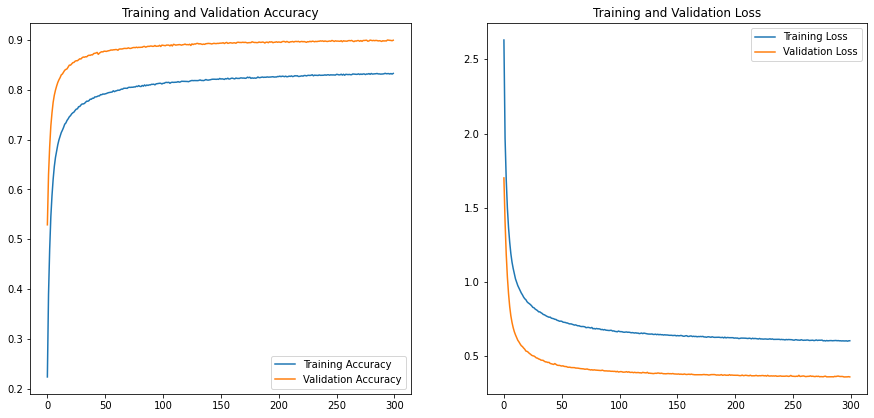

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(N_EPOCHS)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [52]:
predictions = model.predict_classes(X_test)

# categories = [x.split('/')[-1].split('.')[0] for x in data_files]
print(classification_report(y_test, predictions, target_names = categories)) 

/home/gabrielzezze/.local/share/virtualenvs/ProjetoML-I6gg8voT/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

        book       0.00      0.00      0.00      4971
         bus       0.09      0.18      0.12      5039
       apple       0.00      0.00      0.00      4909
    airplane       0.00      0.00      0.00      5087
      cactus       0.07      0.05      0.06      4881
        bush       0.06      0.48      0.10      5007
   butterfly       0.00      0.00      0.00      5064
        bird       0.00      0.00      0.00      5093
   ambulance       0.03      0.06      0.04      5063
       beach       0.06      0.04      0.05      4940
         axe       0.00      0.00      0.00      4899
      banana       0.00      0.00      0.00      5006
 alarm clock       0.00      0.00      0.00      5058
  basketball       0.06      0.11      0.07      5016
         bed       0.00      0.00      0.00      5030
        barn       0.00      0.00      0.00      4937

    accuracy                           0.06     80000
   macro avg       0.02   

/home/gabrielzezze/.local/share/virtualenvs/ProjetoML-I6gg8voT/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gabrielzezze/.local/share/virtualenvs/ProjetoML-I6gg8voT/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gabrielzezze/.local/share/virtualenvs/ProjetoML-I6gg8voT/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa